In [2]:
import random
import pandas as pd
import seaborn as sns
# import tmap as tm
# from faerun import Faerun
# from mhfp.encoder import MHFPEncoder
from tqdm import tqdm
tqdm.pandas()
from rdkit.Chem import AllChem as Chem
import matplotlib.pyplot as plt
import massspecgym.utils as utils
%reload_ext autoreload
%autoreload 2

In [63]:
df = utils.load_massspecgym()
df

,mzs,intensities,inchi,inchikey,precursor_mz,adduct,parent_mass,formula,precursor_formula,instrument_type,collision_energy,smiles,fold,simulation_challenge
identifier,,,,,,,,,,,,,,
MassSpecGymID0000001,"[91.0542, 125.0233, 154.0499, 155.0577, 185.09...","[0.24524524524524524, 1.0, 0.08008008008008008...",InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...,VFMQMACUYWGDOJ,288.1225,[M+H]+,287.115224,C16H17NO4,C16H18NO4,ITFT,30.0,CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,train,True
MassSpecGymID0000002,"[91.0542, 125.0233, 155.0577, 185.0961, 229.08...","[0.0990990990990991, 0.28128128128128127, 0.04...",InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...,VFMQMACUYWGDOJ,288.1225,[M+H]+,287.115224,C16H17NO4,C16H18NO4,ITFT,20.0,CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,train,True
MassSpecGymID0000003,"[69.0343, 91.0542, 125.0233, 127.039, 153.0699...","[0.03403403403403404, 0.31431431431431434, 1.0...",InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...,VFMQMACUYWGDOJ,288.1225,[M+H]+,287.115224,C16H17NO4,C16H18NO4,ITFT,40.0,CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,train,True
MassSpecGymID0000004,"[69.0343, 91.0542, 110.06, 111.0441, 112.0393,...","[0.17917917917917917, 0.47347347347347346, 0.0...",InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...,VFMQMACUYWGDOJ,288.1225,[M+H]+,287.115224,C16H17NO4,C16H18NO4,ITFT,55.0,CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,train,True
MassSpecGymID0000005,"[91.0542, 125.0233, 185.0961, 229.0859, 246.11...","[0.07807807807807808, 0.1841841841841842, 0.03...",InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...,VFMQMACUYWGDOJ,288.1225,[M+H]+,287.115224,C16H17NO4,C16H18NO4,ITFT,10.0,CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,train,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MassSpecGymID0414168,"[55.054474, 58.029369, 58.065601, 59.049339, 6...","[0.0004935684823754727, 0.00012405427491363124...",InChI=1S/C46H77NO17/c1-13-33-30(22-58-45-42(57...,WBPYTXDJUQJLPQ,916.5290,[M+H]+,915.521724,C46H77NO17,C46H78NO17,QTOF,NaN,CC[C@@H]1[C@H](/C=C(/C=C\C(=O)[C@@H](C[C@@H]([...,val,False
MassSpecGymID0414171,"[72.043739, 86.060242, 98.058304, 99.0634, 126...","[0.0019527744563354998, 0.0016939927337585416,...",InChI=1S/C22H23ClN2O8/c1-21(32)7-6-8-15(25(2)3...,DHPRQBPJLMKORJ,479.1230,[M+H]+,478.115724,C22H23ClN2O8,C22H24ClN2O8,QTOF,NaN,C[C@@]1([C@H]2C[C@H]3[C@@H](C(=O)C(=C([C@]3(C(...,test,False
MassSpecGymID0414172,"[72.080132, 102.233917, 113.082344, 113.121498...","[0.021173783463613503, 0.007516001055215398, 0...",InChI=1S/C21H43N5O7/c1-9(25-3)13-6-5-10(22)19(...,CEAZRRDELHUEMR,478.3250,[M+H]+,477.317724,C21H43N5O7,C21H44N5O7,QTOF,NaN,C[C@H]([C@@H]1CC[C@H]([C@H](O1)O[C@@H]2[C@H](C...,val,False


In [64]:
df['instrument_type']= df['instrument_type'].apply(lambda x: 'Orbitrap' if x in ['QFT', 'ITFT'] else x)
print(df['instrument_type'].value_counts())
df = df.rename(columns={
    'instrument_type': 'Instrument type',
    'collision_energy': 'Collision energy [eV]',
    'adduct': 'Ionization adduct',
    'precursor_mz': 'Precursor m/z',
})

instrument_type
Orbitrap    172058
QTOF         53823
Name: count, dtype: int64


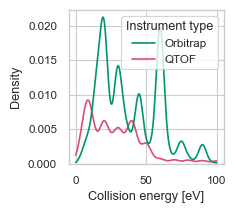

In [65]:
utils.init_plotting(figsize=(2, 2))
sns.kdeplot(x=df['Collision energy [eV]'], hue=df['Instrument type'], clip=(0, 100))
plt.savefig('energies_kde.svg')
plt.show()

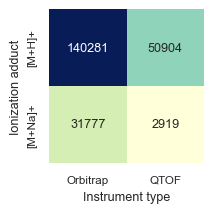

In [66]:
utils.init_plotting(figsize=(2, 2))
pivot_table = df.pivot_table(columns='Instrument type', index='Ionization adduct', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='d', cmap="YlGnBu", cbar_kws={'label': 'Count'}, cbar=False)
plt.savefig('adducts_heatmap.svg')
plt.show()

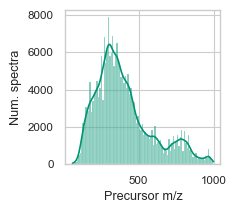

In [49]:
sns.histplot(df['Precursor m/z'], bins=100, kde=True)
plt.ylabel('Num. spectra')
plt.savefig('prec_mzs_kde.svg')
plt.show()

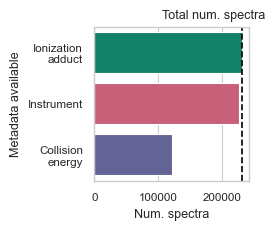

In [118]:
utils.init_plotting(figsize=(2, 2))
sns.barplot(
    x=[len(df['Ionization adduct'].dropna()), len(df['Instrument type'].dropna()), len(df['Collision energy [eV]'].dropna())],
    y=['Ionization\nadduct', 'Instrument', 'Collision\nenergy'],
    hue=['Ionization\nadduct', 'Instrument', 'Collision\nenergy']
)
plt.axvline(x=len(df), color='black', linestyle='--')
plt.xlabel('Num. spectra')
plt.ylabel('Metadata available')
plt.text(len(df) - 125_000, -0.65, f'Total num. spectra')
plt.savefig('metadata_bars.svg')
plt.show()

### Molecules

In [8]:
df_classes = pd.read_csv(utils.hugging_face_download('auxiliary/MassSpecGym_classyfire_all.tsv'), sep='\t', usecols=range(5), names=['inchi', 'class1', 'class2', 'class3', 'class4'])
print(len(df_classes))
display(df_classes.nunique())
df_classes = df_classes.set_index('inchi')

27605


inchi     27605
class1      179
class2      228
class3      304
class4      370
dtype: int64

In [9]:
df_mols = df.drop_duplicates('inchikey')
df_mols['chemical_class'] = df_mols['inchikey'].map(df_classes['class3'])
df_mols

/tmp/ipykernel_442654/1841353018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mols['chemical_class'] = df_mols['inchikey'].map(df_classes['class3'])


,mzs,intensities,inchi,inchikey,precursor_mz,adduct,parent_mass,formula,precursor_formula,instrument_type,collision_energy,identifier,smiles,fold,simulation_challenge,chemical_class
0,"91.0542,125.0233,154.0499,155.0577,185.0961,20...","0.24524524524524524,1.0,0.08008008008008008,0....",InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...,VFMQMACUYWGDOJ,288.1225,[M+H]+,287.115224,C16H17NO4,C16H18NO4,ITFT,30.0,MassSpecGymID0000001,CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,train,True,Lactones
11,"55.0185,67.0542,68.9971,69.0699,71.0491,79.054...","0.11411411411411411,0.07607607607607608,0.0400...",InChI=1S/C18H22O5/c1-12-6-5-9-14(19)8-4-2-3-7-...,MBMQEIFVQACCCH,319.1535,[M+H]+,318.146224,C18H22O5,C18H23O5,ITFT,50.0,MassSpecGymID0000012,C[C@H]1CCCC(=O)CCC/C=C/C2=C(C(=CC(=C2)O)O)C(=O)O1,train,True,Lactones
42,"109.0634,192.0642","0.043043043043043044,1.0","InChI=1S/C22H23N5O4/c1-4-21(2,3)22(14-7-5-6-8-...",GIYROBMIPLLHQE,422.1817,[M+H]+,421.174424,C22H23N5O4,C22H24N5O4,ITFT,40.0,MassSpecGymID0000052,CC(C)(C=C)C1(C2=CC=CC=C2N(C1=O)O)CC3C(=O)N/C(=...,train,True,"Amino acids, peptides, and analogues"
51,"85.0284,137.0597,155.0703,197.0808","0.05405405405405406,0.05405405405405406,1.0,0....",InChI=1S/C10H12O4/c1-6-4-9-8(14-9)3-2-7(11)5-1...,MXRJZFNJVFPSQN,197.0803,[M+H]+,196.073024,C10H12O4,C10H13O4,ITFT,10.0,MassSpecGymID0000061,C[C@@H]1C[C@H]2[C@H](O2)/C=C\C(=O)CC(=O)O1,train,True,Organoheterocyclic compounds
59,"245.0444,253.0495,271.0601,285.0757,287.055,28...","0.4924924924924925,0.056056056056056056,0.3243...",InChI=1S/C18H16O9/c1-18-5-6-11(8(26-18)4-10(27...,HNMWDXUKPJZOQD,377.0861,[M+H]+,376.078824,C18H16O9,C18H17O9,ITFT,20.0,MassSpecGymID0000069,CC12CC3=C(C(O1)C[C@@H](O2)C(=O)O)C(=C4C(=O)C=C...,train,True,Organoheterocyclic compounds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231083,"120.041023,120.045662,136.04686,136.050156,136...","0.060218978102189784,0.07937956204379562,0.055...",InChI=1S/C19H21N7O6/c20-19-25-15-14(17(30)26-1...,OZRNSSUDZOLUSN,444.1630,[M+H]+,443.155724,C19H21N7O6,C19H22N7O6,QTOF,NaN,MassSpecGymID0414136,C1C(=NC2=C(N1)N=C(NC2=O)N)CNC3=CC=C(C=C3)C(=O)...,train,False,"Amino acids, peptides, and analogues"
231084,"51.02533,51.02734,51.029362,51.032391,55.0191,...","0.38415841584158417,0.36435643564356435,0.2217...",InChI=1S/C9H10O3/c10-8-4-2-1-3-7(8)5-6-9(11)12...,CJBDUOMQLFKVQC,167.0710,[M+H]+,166.063724,C9H10O3,C9H11O3,QTOF,NaN,MassSpecGymID0414138,C1=CC=C(C(=C1)CCC(=O)O)O,train,False,Phenylpropanoids and polyketides
231085,"95.0,96.0,121.0,135.0,163.0,181.0","0.28,0.11,0.07,0.17,0.15,1.0",InChI=1S/C9H12N2O2/c1-11-6-10-4-8(11)2-7-3-9(1...,YOIFSTUAGLOWPB,181.0940,[M+H]+,180.086724,C9H12N2O2,C9H13N2O2,QTOF,NaN,MassSpecGymID0414147,CN1C=NC=C1C[C@@H]2CC(=O)OC2,train,False,Organoheterocyclic compounds
231086,"71.046097,85.025002,129.052704,302.044586,317....","0.06,0.1,0.05,0.04,1.0,0.05,0.92,0.04,0.24",InChI=1S/C28H32O15/c1-9-18(31)21(34)23(36)27(3...,UNMZJSVCTCKOEC,609.1790,[M+H]+,608.171724,C28H32O15,C28H33O15,QTOF,NaN,MassSpecGymID0414148,CC1[C@@H]([C@@H](C([C@@H](O1)OC2=CC(=C3C(=C2)O...,train,False,Organoheterocyclic compounds


In [10]:
fp_size = 2048
enc = MHFPEncoder(fp_size)
df_mols['mhfp'] = df_mols['smiles'].progress_apply(lambda s: tm.VectorUint(enc.encode_mol(Chem.MolFromSmiles(s))))
df_mols['mhfp']

100%|██████████| 28929/28929 [04:23<00:00, 109.70it/s]
/tmp/ipykernel_442654/2976327974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mols['mhfp'] = df_mols['smiles'].progress_apply(lambda s: tm.VectorUint(enc.encode_mol(Chem.MolFromSmiles(s))))


0         [149873304, 167050623, 122868856, 109021789, 5...
11        [54297102, 36123943, 78177578, 173301519, 1680...
42        [5225406, 96495921, 51965165, 35377053, 121199...
51        [108862666, 50015874, 118133710, 76375303, 664...
59        [54297102, 13454827, 105751502, 38795470, 1680...
                                ...                        
231083    [179620309, 33988699, 66366750, 82611468, 5339...
231084    [54297102, 36123943, 367406790, 82611468, 1680...
231085    [19469312, 52104900, 145399841, 70898887, 1587...
231086    [5957539, 6028326, 63689098, 113947674, 264749...
231087    [5957539, 6028326, 63689098, 65607474, 2647491...
Name: mhfp, Length: 28929, dtype: object

In [35]:
l = 128
lf = tm.LSHForest(fp_size, 128)
lf.batch_add(df_mols['mhfp'].tolist())
lf.index()

cfg = tm.LayoutConfiguration()
cfg.node_size = 1 / 37
x, y, s, t, _ = tm.layout_from_lsh_forest(lf, cfg)
df_mols['x'] = x
df_mols['y'] = y

/tmp/ipykernel_442654/1177400570.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mols['x'] = x
/tmp/ipykernel_442654/1177400570.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mols['y'] = y


In [29]:
k = 13
topk_classes = df_mols['chemical_class'].value_counts()[:k]
df_mols['chemical_class_topk'] = df_mols['chemical_class'].apply(
    lambda c: c if c in topk_classes.index else f'Other ({df_mols["chemical_class"].nunique() - k} classes)'
)
df_mols['chemical_class_topk'].value_counts()

/tmp/ipykernel_442654/1661677651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mols['chemical_class_topk'] = df_mols['chemical_class'].apply(


Other (292 classes)                          10386
Organoheterocyclic compounds                  3908
Amino acids, peptides, and analogues          3669
Organosulfur compounds                        2203
Lipids and lipid-like molecules               2047
Carbohydrates and carbohydrate conjugates     1480
Halobenzenes                                  1129
Ketones                                        907
Lactones                                       799
Alcohols and polyols                           712
Pyrimidines and pyrimidine derivatives         593
Alkyl aryl ethers                              572
Pyrans                                         524
Name: chemical_class_topk, dtype: int64

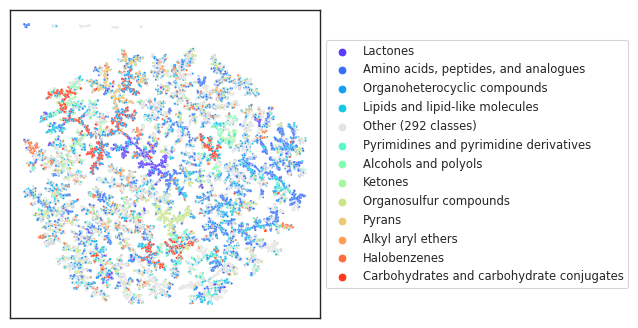

In [36]:
utils.init_plotting(figsize=(4, 4), style='white')

unique_classes = df_mols['chemical_class_topk'].unique()
non_other_classes = [c for c in unique_classes if c != 'Other']
colors = sns.color_palette('rainbow', len(non_other_classes))
custom_palette = {category: color for category, color in zip(non_other_classes, colors)}
custom_palette['Other (292 classes)'] = '#E5E4E2'

import matplotlib as mpl

plt.xticks([])
plt.yticks([])

sns.scatterplot(data=df_mols, x='x', y='y', s=2, hue='chemical_class_topk', palette=custom_palette)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('')
plt.ylabel('')

plt.savefig('mols_tmap.png', dpi=500, bbox_inches='tight')
plt.show()